<b> [캐글 필사/번역] </b> <br>
Date : 2020/07/28 <br>
Auther : Ashwini Swain <br>
kaggle link : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

Kaggle 커널 한글화 프로젝트: <br>
https://kaggle-kr.tistory.com/25?fbclid=IwAR3tcLF0ukqUr_wikwVqnfm1jhR4SSJHGxZydO767YEinnnoaWedDGNVONk

Kaggle Korea 블로그 : <br>
https://kaggle-kr.tistory.com/?fbclid=IwAR3wgGKC12tLtbC3bimR4XnwuT2KEtelM1yomcs887RR-LMTQk5uG_FuEWQ


# EDA To Prediction (DieTanic)

<b> Contents of the Notebook: </b><br><br>
<b>Part1: Exploratory Data Analysis(EDA):</b><br>
1)Analysis of the features.<br>
2)Finding any relations or trends considering multiple features.

<b>Part2: Feature Engineering and Data Cleaning:</b><br>
1)Adding any few features.<br>
2)Removing redundant features.<br>
3)Converting features into suitable form for modeling.

<b>Part3: Predictive Modeling</b><br>
1)Running Basic Algorithms.<br>
2)Cross Validation.<br>
3)Ensembling.<br>
4)Important Features Extraction.<br>



## Part1: Exploratory Data Analysis(EDA)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') #https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
import warnings
warnings.filterwarnings('ignore') #경고문 무시하기
%matplotlib inline

In [2]:
data=pd.read_csv('/Users/minseunghong/Documents/Study/Kaggle/Titanic/train.csv')
# data=pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #전체적으로 null값 있는 속성 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에는 null값이 있으므로 수정 필요함

### 생존자 수가 얼마나 되나? How many Survived?

0    549
1    342
Name: Survived, dtype: int64


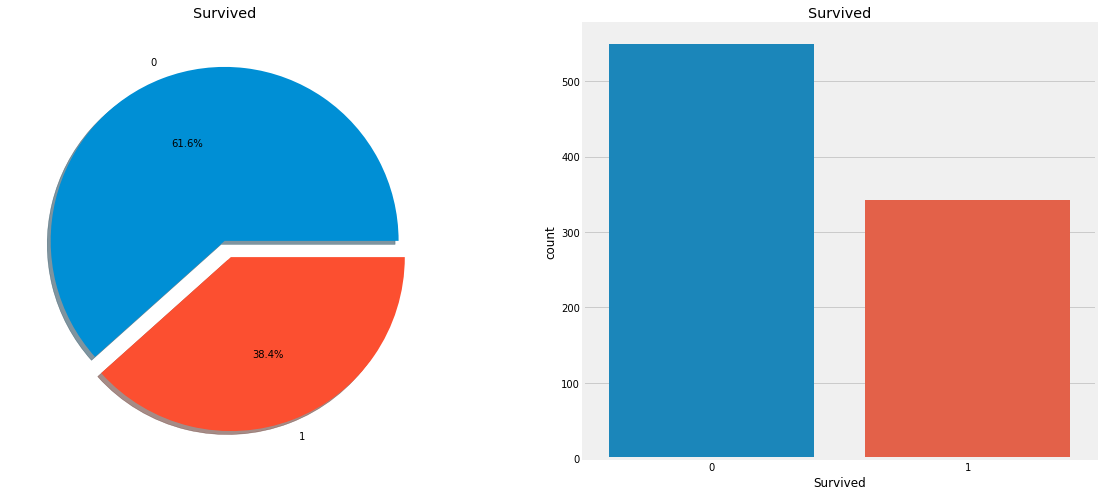

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #그래프 그릴 칸 2 개(1,2) 만들어놓기

print(data['Survived'].value_counts())

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) 
    #explode = 파이 조각이 돌출되는 크기
    #autopct = 파이 조각의 전체 대비 백분율
    #shadow = 그림자 효과
    #ax[0] = (1,1), ax[1] = (1,2)
ax[0].set_title('Survived') #차트 제목 붙이기
ax[0].set_ylabel('') #Y축은 없음

sns.countplot('Survived', data=data, ax=ax[1]) #빈도 막대그래프, barplot과 다르게 x축 설정할 필요가 없음
ax[1].set_title('Survived')
plt.show()

이렇게 보니 생존자가 많지 않다는 게 명확해졌다. 

훈련 데이터셋의 승객 891명 중 350명만 살아남았고, 즉 38.4%의 승객만이 사고에서살아남았다. 이제 어떤 카테고리의 승객들이 생존했고 사망했는지, 더 깊은 인사이트를 얻기 위해 데이터를 파봐야 한다.

데이터셋의 다양한 변수를 사용해서 각각의 생존율을 볼 것이다. 예를 들어서 성별이나, 탑승한 곳, 나이 등등에 따라서 생존율이 어떻게 달라지는지 확인할 수 있다.

먼저, 데이터셋에 어떤 변수들이 있는지 이해해야 한다.

### 변수 타입 Types Of Features

<b>범주형 변수 Categorical Feature:</b><br>
범주형 변수는 각각의 카테고리를 나누는 두개 혹은 그 이상의 범주로 구성된다. 예를 들어, 성별은 두 개의 범주로 구성된 범주형 변수이다(남/여). 범주형 변수는 순차적으로 정렬되거나 순서를 가질 수 없다. 다른 이름으로 명명척도라고도 불린다.

<b>데이터 셋의 범주형 변수: 성별(Sex), 탑승지(Embarked)</b><br>

<b>서열 변수(서열 척도, Ordinal Features):</b><br>
서열 변수는 범주형 변수와 비슷하지만 상대적인 크기나 순서를 가진다. 예를 들어, 키를 Tall / Mediul / Short으로 나누었을 때, 키는 서열 변수가 된다. 서열 변수는 상대적 크기/순서에 따라 정렬할 수 있다.

<b>데이터 셋의 서열 변수: PClass</b><br>

<b>연속형 변수(서열 척도, Ordinal Features):</b><br>
특정한 두 점(최댓값, 최솟값) 사이 어느 값이라도 가질 수 있다면 연속형 변수라고 부를 수 있다.

<b>데이터 셋의 연속형 변수: 나이(Age)</b><br>

### Analysing The Features¶


#### Sex--> Categorical Feature¶

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count() #성별, 생존여부를 기준으로 승객 수를 집계

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

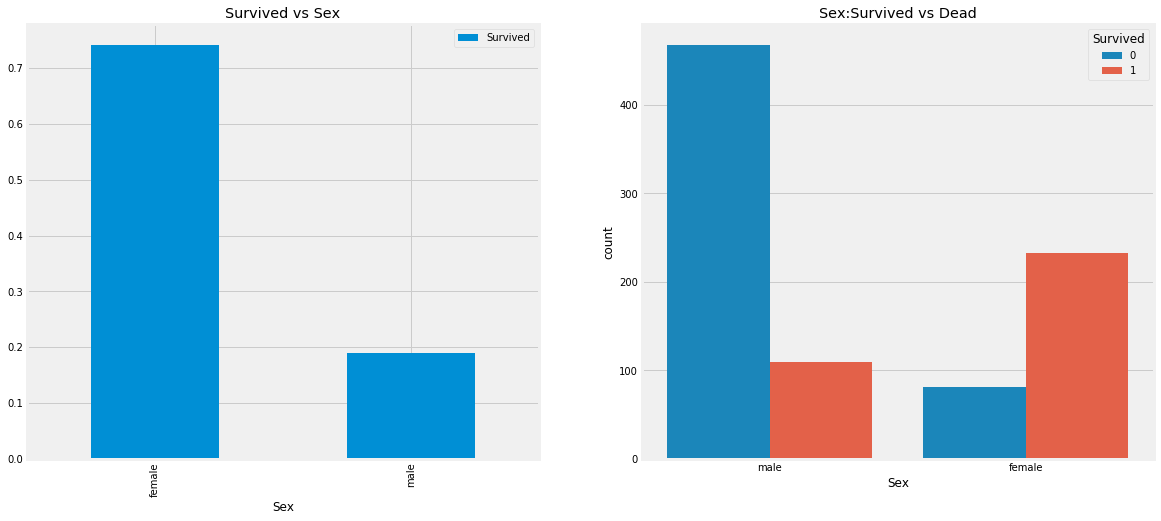

In [7]:
f,ax=plt.subplots(1,2, figsize = (18,8)) #플롯을 그릴(1,2) 1행 2열 만들기

#(1,1) plot
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) #성별을 기준으로 생존한 비율 집계
ax[0].set_title('Survived vs Sex') #plot의 title 넣기

#(1,2)plot
sns.countplot('Sex',hue='Survived',data=data, ax=ax[1]) #성별을 x축으로, 생존수를 색상으로 나누어 승객 수를 집계함
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

흥미로운 결과다. 배에 탑승한 승객 수로만 보면, 남성 승객 수가 여성 승객 수보다 훨씬 더 많음에도 불구하고, 생존한 여성 승객 수가 생존한 남성 승객 수의 2배 가까이 된다. 여성 승객의 생존율은 75%인데, 남성 승객의 승객의 생존율은 18-19%에 그친다.

이 정보를 보니, 성별이 모델링에 굉장히 중요한 변수로 작용할 것으로 보인다. 
하지만 이 변수가 최선일까? 다른 변수들을 몇 가지 더 살펴보자!

### Sex--> Categorical Feature¶

In [8]:
pd.crosstab(data.Pclass,data.Survived,margins = True).style.background_gradient(cmap='summer_r') #margins: 총합계
#https://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.core.style.Styler.background_gradient.html
#https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


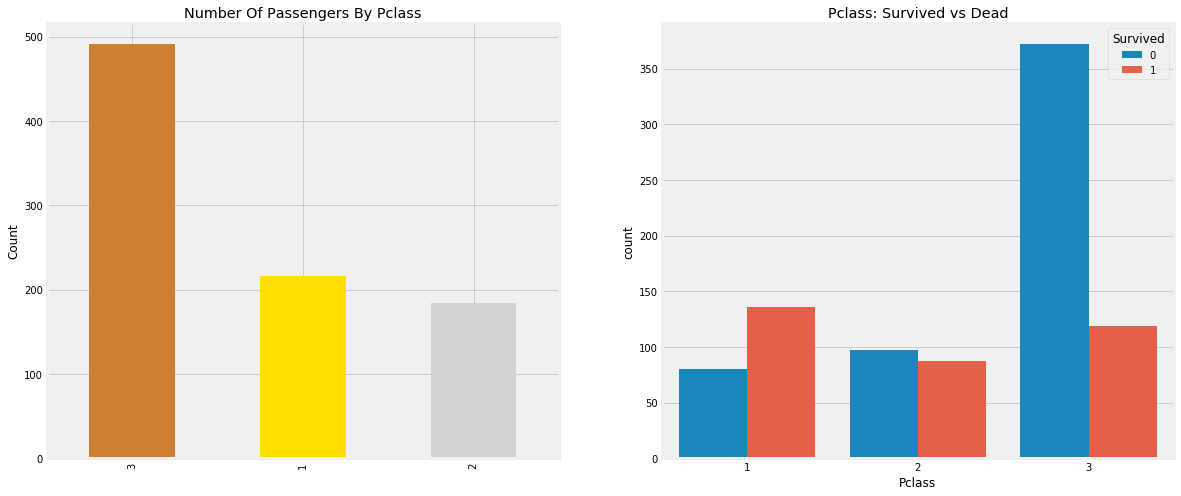

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0]) #1등칸, 2등칸, 3등칸의 승객 수 비교
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count') #Y축 라벨

sns.countplot('Pclass', hue='Survived',data=data, ax=ax[1]) #탑승칸 클래스 별 생존/사망자 수
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

돈으로 모든 것을 살 수는 없다고 하지만, 1등칸의 승객들의 구조 우선순위가 높았던걸로 보인다. 3등칸의 승객 수가 훨씬 많지만, 생존자 비율은 25%가량으로 굉장히 낮다. 

1등칸 승객의 생존율은 63%, 2등칸 승객의 생존율은 48%였다. 돈과 지위가 중요한 물질주의 사회의 단면이다..

좀 더 자세히, 흥미로운 결과들을 확인해보기 위해 성별과 탑승칸을 함께 고려했을 때의 생존율을 확인해보자.

In [10]:
pd.crosstab([data.Sex, data.Survived],data.Pclass, margins=True).style.background_gradient(cmap='summer')

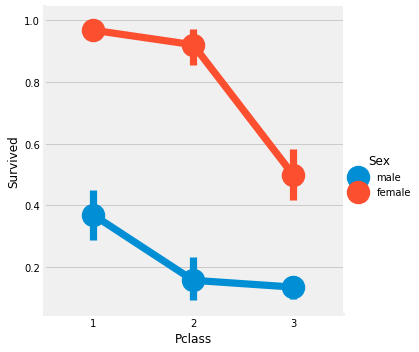

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=data)  #성별/class별로 생존자 비중
plt.show()

#https://www.kite.com/python/docs/seaborn.factorplot

범주형 변수의 값을 쉽게 분류해서 보기 위해서 FactorPlot을 사용했습니다.

CrossTab과 FactorPlot을 보면, 1등칸의 여성 생존율이 95-96%로 94명 중 3명만이 사망했음을 알 수 있습니다.

Pclass와 무관하게, 여성이 구조에서 우선순위에 있었음이 명확하다ㅣ. 1등칸이어도 남성 승객은 생존율이 매우 낮았다.

일단, Pclass도 중요한 변수로 보이는데, 다른 변수들도 더 살펴보자!

### Age--> Continous Feature

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


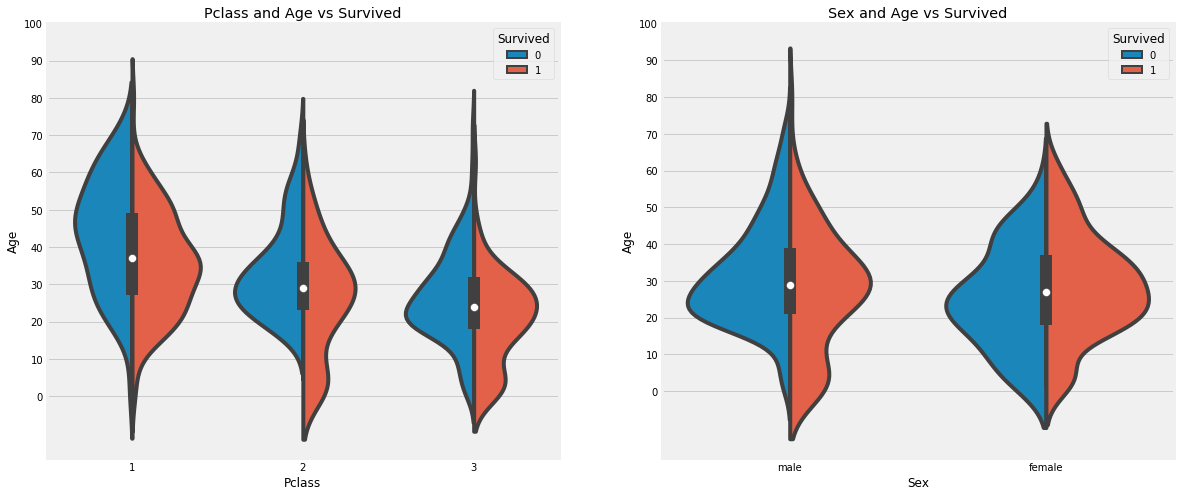

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
#pclass별 생존자/사망자의 나이 분포 비교
sns.violinplot("Pclass", "Age", hue = "Survived", data=data, split=True, ax=ax[0])
#pclass를 x축으로, 나이를 y축으로, 생존여부를 기준으로 그래프의 좌/우를 나눠서 그리기
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

#성별별로 생존자/사망자의 나이분포 비교
sns.violinplot("Sex", "Age", hue = "Survived", data = data, split = True, ax = ax[1])
#성별을 x축, 나이를 y축으로 놓고, 생존여부를 기준으로 그래프의 좌/우를 나눠서 그리기
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<b> 관찰 결과: </b>

1)Pclass 숫자가 증가할수록 10세 이하(어린이)의 수가 증가하는데, 이들은 Pclass와 무관하게 높은 생존율을 보인다.
2)1등칸의 20~50세 승객의 생존율이 매우 높은데, 심지어 여성의 경우보다 높다.
3)남성의 경우, 나이가 증가할수록 생존율이 낮아진다.

앞서 본 것 처럼, 나이에 117개의 null값이 있었다. 이를 채우기 위해서 NaN 데이터셋에 평균 나이를 할당할 수 있다.

하지만 문제는, 승객마다 나이가 굉장히 다양했기 때문에 4살짜리 아이에게 29살이라는 평균연령을 부여하게 될 수도 있다는 것이다. 저 승객들의 연령대를 알아낼 수 있는 방법이 없을까?

방법은, "Name"변수를 확인하는 것이다. Name변수를 살펴보면, 이름 앞에 Mr.이나 Mrs.같은 호칭이 붙어있다는 걸 발견할 수 있다. 따라서 Mr, Mrs 호칭에 따라 각 그룹에 맞는 평균 값을 할당할 수 있다.

### ''What's In A Name??''---> Feature :P

In [14]:
data['Initial'] = 0 #먼저 0을 할당해놓고,
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #알파벳 대문자/소문자를 추출한다.

여기에서는 정규표현식을 사용한다 : <b> [A-Za-z]+).. </b>
이 정규표현식은 .(dot)으로 끝나는 A-Z 혹은 a-z사이의 문자열을 찾아준다. 이 정규표현식을 사용하면 이름으로부터 호칭을 성공적으로 추출해 낼 수 있다.


In [15]:
# data["Initial"]
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle, Mme같은 오타가 몇 개 있어서, 이 경우에는 적절하게 바꿔준다.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [18]:
#평균 나이의 반올림한 값(ceil)을 각 NaN값에 할당한다
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=45

In [19]:
data.Age.isnull().any() #이렇게 할당하고나면 이제 null값은 없다!

False

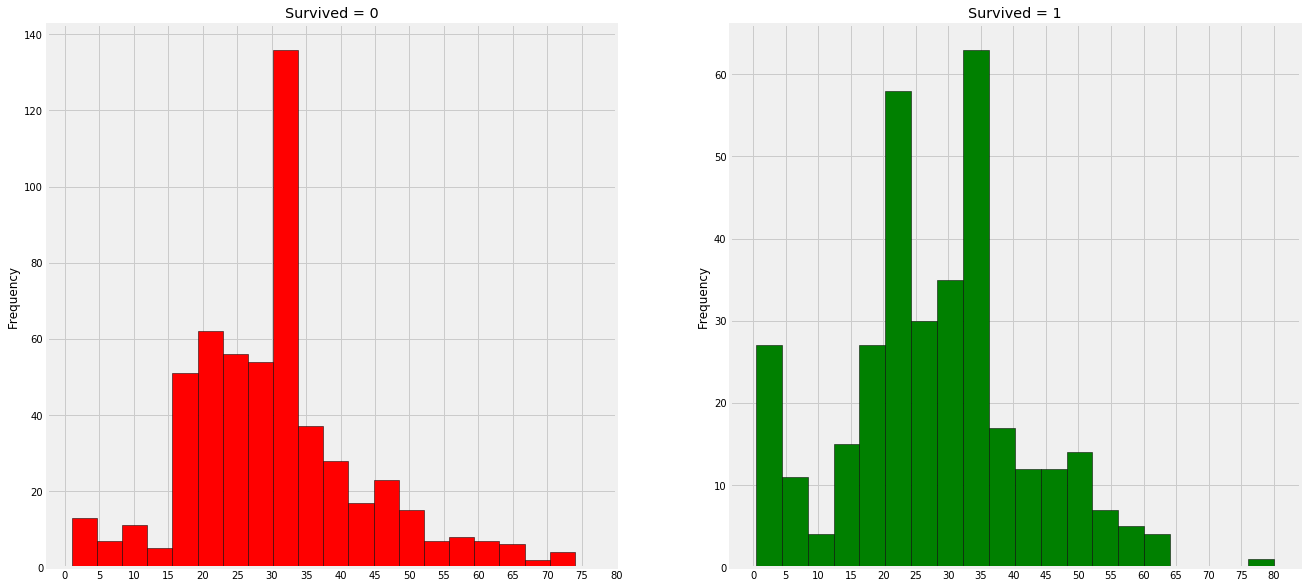

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
#사망자의 나이별 히스토그램
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black', color = 'red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5)) #x축 범위 및 간격 설정
ax[0].set_xticks(x1)  #x축 할당

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()

<b> 관찰 결과: </b>

1) 영아들(5세 미만)은 대부분 살아남았다 (The Women and Child FIrst Polict)

2) 최고령 승객도 살아남았다 (80세)

3) 사망자 수가 가장 많았던 연령대는 30~40대이다

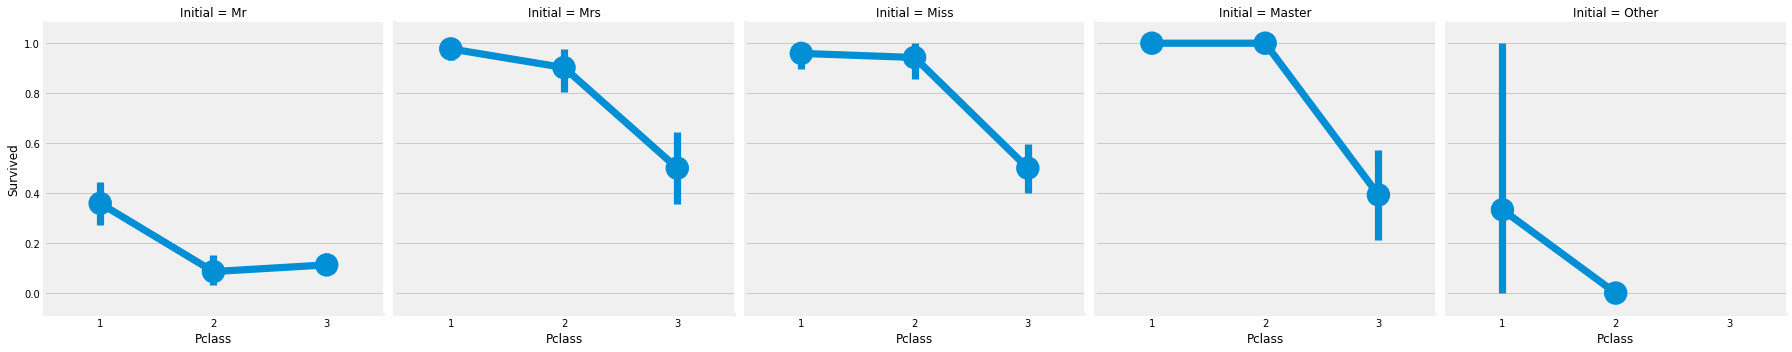

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

몇등칸에 타던지, 여성과 아이의 생존율이 더 높았다.

### Embarked -> Categorical Value

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')
#탑승지별, 탑승칸(Pclass)별, 성별별로 생존자/사망자 수 집계하기

#### 탑승지별 생존확율 Chances for Survival by Port of Embarkation

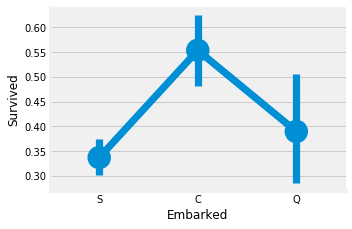

In [23]:
sns.factorplot('Embarked','Survived', data=data)
fig=plt.gcf()  
## GCF = Get Current Figure
fig.set_size_inches(5,3) #figure size 정하는 다른 방법! cf) figsize
plt.show()

항구 C에서 탑승한 승객들의 생존확율이 0.55로 가장 높았고, 반대로 S에서 탑승한 승객들의 생존확률이 제일 낮았다.

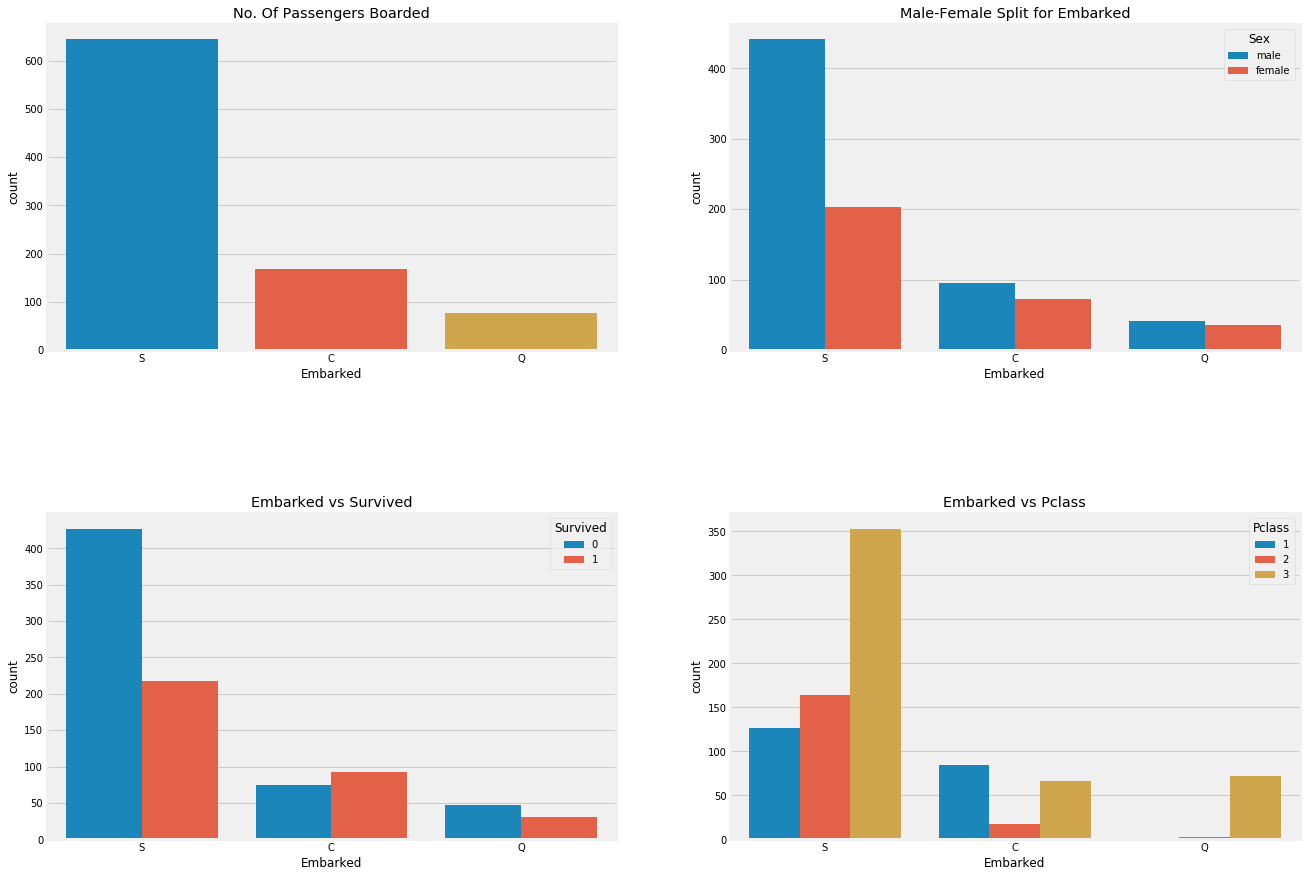

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15)) #(2,2), 4칸짜리 자리 만들어놓고,

#탑승지 별 탑승객 수
sns.countplot('Embarked', data=data, ax=ax[0,0]) 
ax[0,0].set_title('No. Of Passengers Boarded')

#탑승지, 성별 별 탑승객 수
sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

#탑승지 별 생존자/사망자 수
sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

#탑승지, 탑승칸(Pclass)별 탑승객 수
sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5) #subplot 간격조정
plt.show()

<b>관찰 결과:</b>

1) 가장 많은 승객이 S에서 탑승했고, 대부분 3등칸 승객이었다.

2) C에서 탑승한 승객들이 행운아였는지, 이들 중 생존자 비중이 높다. 
<br> 1등칸, 2등칸 승객들이 대부분 구조되었기 때문일것이다 (crosstab 참고)

3) 부유한 승객들의 대부분이 S에서 탑승했는데도 불구하고 생존율이 낮다. 왜냐하면 S에서 탑승한 3등칸 승객의 81%가 살아남지 못했기 때문이다.

4) Q항구의 경우는 95%가 3등칸 승객이다

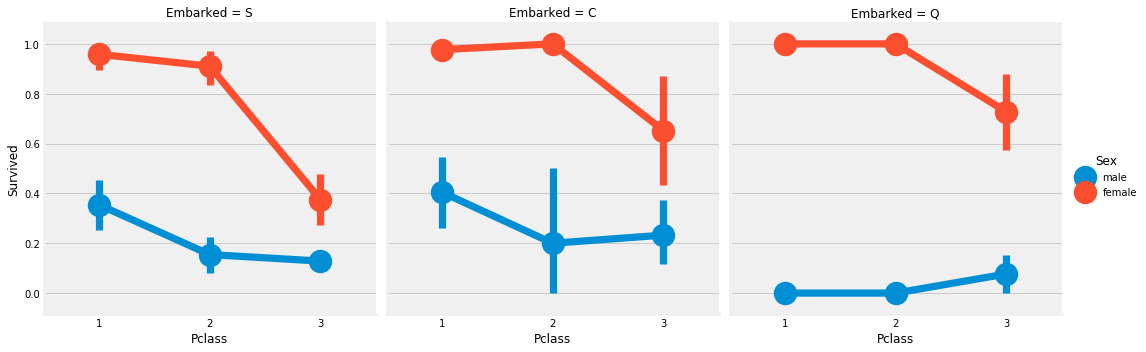

In [25]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

<b>관찰 결과:</b>

1) 탑승 항구에 상관없이, 1등칸, 2등칸 여성 승객은 대부분 살아남았다 (생존확률 거의 1에 가까움)

2) 다만 3등칸 승객의 경우 S항구에서 탑승한 승객들의 생존확률이 남, 여 모두에서 매우 낮다

3) 남성 탑승객의 경우 Q항구에서 탑승했을 때 가장 생존확률이 낮았고, 이들은 대부분 3등칸 승객이었다

#### Filling Embarked NaN

앞서 살펴봤을 때, 대부분의 승객들이 S에서 탑승했기 때문에 NaN값들은 다 S로 교체해주려고 한다.

In [26]:
data['Embarked'].fillna("S", inplace = True)

In [27]:
data.Embarked.isnull().any() #이제 NaN값은 없다!

False

### SibSp-->Discrete Feature¶

SibSp변수는 혼자 탔는지, 아니면 형제/배우자와 함께 탔는지를 의미한다.

형제(Sibling) = 형제, 자매, 의형제/자매
배우자(Spouse) = 남편/아내

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')
#함께 탑승한 가족(형제/배우자)수 별로 생존자/사망자 수 집계

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


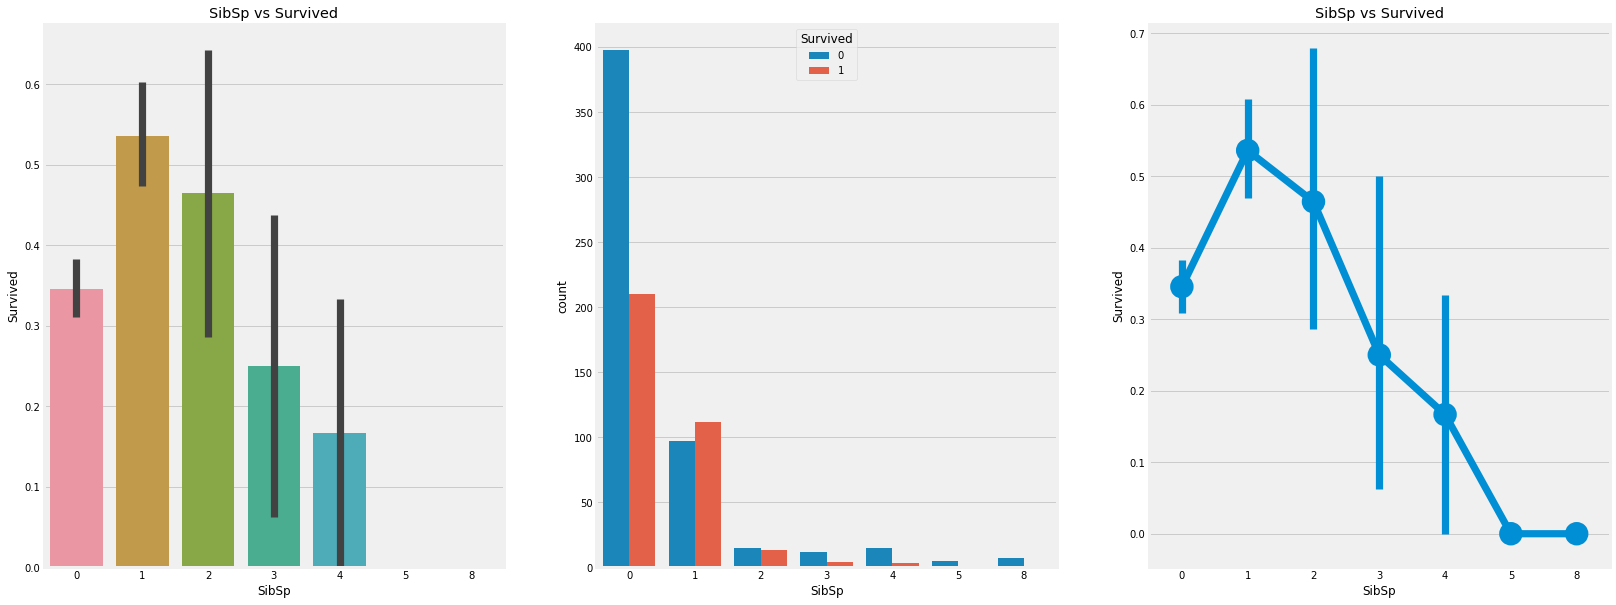

In [29]:
f,ax = plt.subplots(1,3, figsize = (25,10))
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

#원저자는 1번 그래프를 그렸지만, 3번과 같은 내용을 전달하는 그래프이다. 2번처럼 그리는게 더 적합하지 않을까?
sns.countplot(x = 'SibSp', hue = 'Survived', data = data, ax = ax[1]) 

sns.pointplot('SibSp', 'Survived', data = data, ax = ax[2])
ax[2].set_title('SibSp vs Survived')
#원본에서는 factorplot을 사용했는데, 이상하게 factorplot을 쓰면 그려놓은 subplot을 벗어난다..
#그래서 동일한 pointplot으로 변경!

plt.close(3)
# plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


<b>관찰결과 :</b>

막대그래프와 factorplot을 보면 형제나 배우자 없이 혼자 탑승한 경우 34.5%의 생존율을 보임을 알 수 있다. 하지만 형제/배우자의 숫자가 늘어날수록 그래프는 급격하게 감소하는 모습이다. 어느정도 이해가 되는 결과인데, 가족이 같이 타면 나보다는 어떻게든 그들을 구해보려고 애쓸것이기 때문이다.놀랍게도 함께 탑승한 형제/배우자 수가 5~8명인 경우, 생존율은 0%이다. 혹시 탑승칸(Pclass)의 영향일까?

맞다. 크로스탭을 보면, 형제/배우자 수가 3을 넘는 경우 모두 3등칸 승객임을 확인할 수 있다. 즉, 3등칸에 탑승한 대가족은 모두 사망했다.

#### Parch (부모/자식 수)

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


마찬가지로 대가족일수록 3등칸에 탑승했음을 볼 수 있다

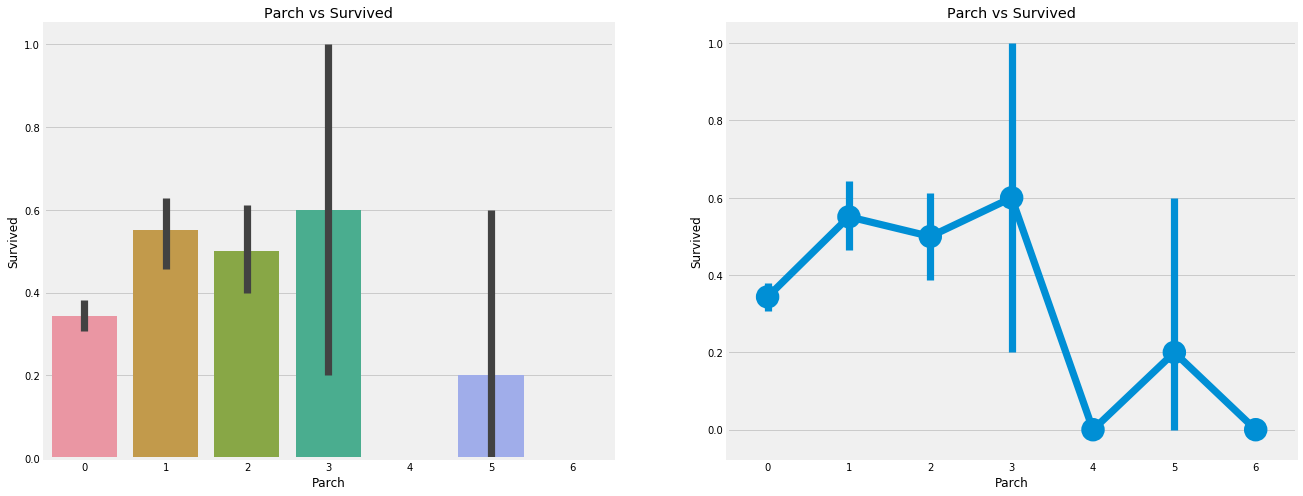

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

<b>관찰 결과: </b>

위와 비슷한 결과이다. 한 두명의 부모/자식과 함께 탑승한 경우 생존률이 높지만, 가족 수가 많아질 수록 마찬가지로 급락한다.

1~3명과 함께 탑승한 경우가 가장 생존률이 높지만, 혼자 탑승한 경우거나 4명 이상과 함께 탑승한 경우에는 치명적이었다.

### Fare--> Continous Feature


In [33]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


공짜로 탄 사람도 있음..!ㅋㅋㅋ

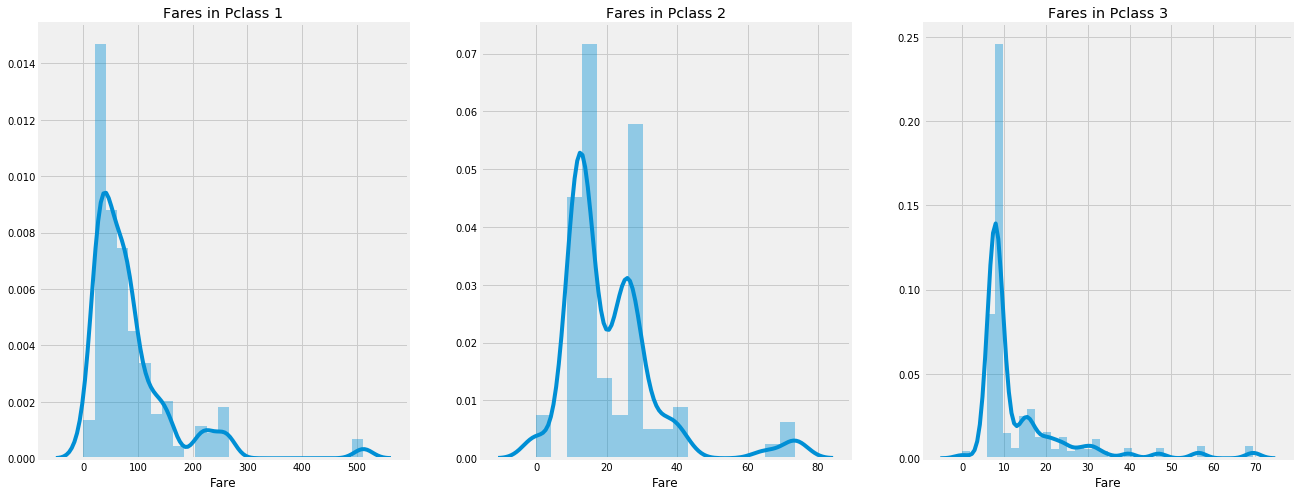

In [34]:
f,ax=plt.subplots(1,3, figsize=(20,8))

#sns.distplot = 일변량의 분포를 그리는 함수. 히스토그램과 밀도함수(KDE)를 동시에 보여준다
#각각을 끄고싶으면 kde=False / hist = False
sns.distplot(data[data['Pclass']==1].Fare, ax = ax[0]) 
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

### 모든 변수에 대한 간단한 관찰 결과 :
Observations in a Nutshell for all features


<b> 성별(Sex): </b>
여성의 생존확률이 남성보다 높다.

<b> 탑승칸(Pclass): </b>
1등칸에 탑승한 승객일수록 생존율이 올라가는 트렌드가 있다. 3등칸의 생존율은 매우 낮았다. 여성의 경우, 1등칸에 탑승한 경우 생존확률이 1에 가깝고, 2등칸에 탔어도 마찬가지로 높은 생존율을 보였다.Money Wins..!
    
<b> 나이(Age): </b>
5~10살 이하의 어린이들의 생존율이 높았고, 15세에서 35세 사이의 연령대에서 많이 사망했다.

<b> 탑승지(Embarked): </b>
굉장히 흥미로운 변수인데, 대부분의 1등칸 승객이 S에서 탑승했음에도 불구하고 C항구에서 탑승한 승객들의 생존율이 높았다. 3등칸 승객의 대부분은 Q에서 탑승했다.

<b> 가족 수(Parch+SibSp): </b>
1~2명의 형제,배우자가 있는 경우, 혹은 1~3명의 부모/자식과 함께 탑승한 경우, 혼자 혹은 대가족으로 탑승한 경우보다 생존확률이 높았다.

### 변수 간 상관 Correlation Between The Features¶


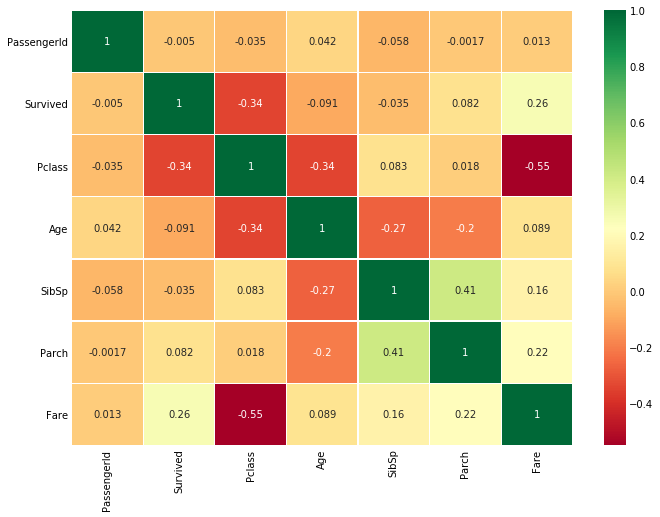

In [35]:
#변수 간 상관을 보기 위한 히트맵
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<b> 히트맵 해석하기 </b> 

일단, 숫자 변수만 비교할 수 있다는 걸 짚고 넘어가야 한다. 알파벳이나 문자열 변수는 상관을 구할 수 없다. 이 그래프를 이해하기 전에, 먼저 "상관"이 무엇인지 명확히 이해하고 넘어가자.

<b> 정적 상관 : 변수 A가 증가하면 변수 B도 증가할 때, 두 변수는 정적 상관이 있다고 한다. 상관이 1일 때는 완벽한 정적 상관이다. </b>

<b> 부적 상관 : 변수 A가 증가하면 변수 B는 감소할 때, 구 변수는 부적 상관이 있다고 한다. 상관이 -1일 때, 완벽한 부적 상관이다. </b>

두 변수간 높은 상관이 있다면, 한 변수가 증가할 때 다른 변수도 같이 움직인다. 즉, 두 변수가 차이가 없는 비슷한 정보를 가지고 있다는 뜻이고, 이 경우 <b> 다중공선성(MultiColinearity)</b>을 유발할 수 있다.

즉, 두 변수를 다 사용하는 것은 불필요하고, 모델을 만들거나 훈련시킬 때는 그런 불필요한 변수들을 제거해줘야 한다!

다시, 위의 히트맵을 보면 서로 상관이 있는 변수가 많지 않다는 걸 볼 수 있다. 가장 높은 상관은 SibSp와 Parch사이의 상관(0.41)이다. 따라서, 우리는 우리가 가지고 있는 변수를 다 사용해보려고 한다.

## Part2: Feature Engineering and Data Cleaning¶


Feature Engineering이란 무엇일까?

한 데이터셋이 주어졌을 때, 그 데이터 안의 모든 변수가 중요하진 않다. 외려 그 중 제거되어야 하는 불필요한 변수들이 많을 가능성이 높다. 혹은 다른 속성에서 관찰된 값을 가지고 새로운 변수를 만들 수도 있다. 앞에서 이름 변수를 활용해 Initial(호칭?) 변수를 만든 것이 바로 그 예시이다. 

지금부터는 우리가 새로운 변수를 만들거나 기존 변수를 제거할 수 있는지 살펴볼 것이다. 그리고 기존 변수를 변형해서 예측모델링에 적합한 변수로 만드는 작업들도 진행할 것이다.


### 연령대 Age_band

<b> 나이 변수의 문제점: </b>

앞서 살펴본 것처럼 <b>나이는 연속변수</b>이다. 연속변수를 머신러닝 모델에 활용할 때 발생할 수 있는 문제들이 있다.

<b> 예를 들어: </b> 
운동선수들을 <b>성별</b>에 따라 분리하거나 정렬하고 하면 쉽게 분리할 수 있겠지만, <b>나이</b>에 따라 그룹을 나누라고 하면 어떻게 할 것인가? 운동선수가 30명이라면 나이 변수의 값은 30개가 존재할 수 있다. 문제다!

그래서 우리는 이런 연속변수들을 구간으로 묶거나 표준화하여 범주형 변수로 변환해줄 필요가 있다.
여기서는 급간으로 묶어볼 것이다.(eg. 일정 범위의 나이를 하나의 구간에 할당해 하나의 값을 매기는 것)

자, 가장 나이 많은 승객이 80세였으니까, 이제 0~80세를 5 간격의 급간으로 나눠보자. 즉, 80/5 = 16이니까, 급간의 크기는 16이다.



In [36]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0 #나이가 16세이하인 행의 Age_band컬럼을 가져와서 0 할당해주기
data.loc[(data['Age'] > 16)&(data['Age']<= 32),'Age_band'] = 1 #나이가 16세 초과 32세 미만인 행의 Age_band 컬럼을 가져와서 1을 할당해주기
data.loc[(data['Age'] > 32)&(data['Age']<= 48),'Age_band'] = 2
data.loc[(data['Age'] > 48)&(data['Age']<= 64),'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

#data.head(2)
data[['Age','Age_band']].head()

,Age,Age_band
0,22.0,1
1,38.0,2
2,26.0,1
3,35.0,2
4,35.0,2


In [37]:
#각 연령대의 승객 수
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#연령대 구간별로 행 수를 세서 데이터프레임으로 만들고 서식입히기

,Age_band
1,382
2,325
0,104
3,69
4,11


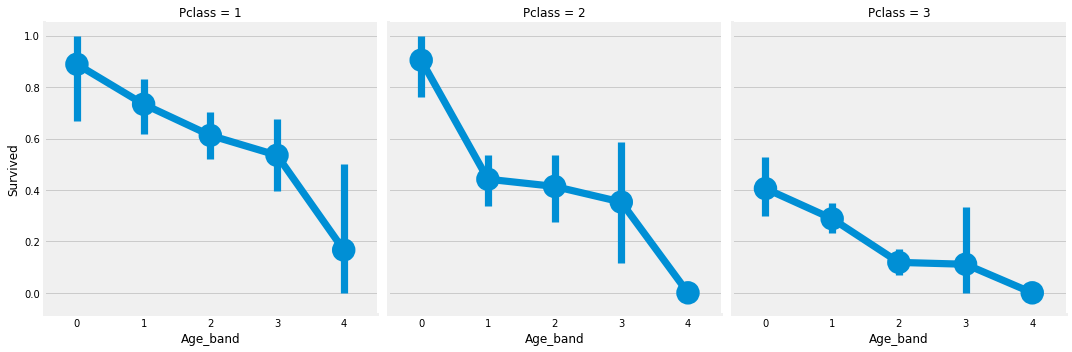

In [38]:
sns.factorplot('Age_band', 'Survived', data=data, col = 'Pclass')
plt.show()

이렇게 보니까, 탑승칸(Pclass)에 무관하게 생존률은 하락한다!

### Family_Size and Alone¶


마찬가지로, "Family_size"와 "Alone"이라는 변수를 만들어서 분석해볼 수 있다.
먼저 Family_size는 Parch와 SibSp변수의 합으로 구할 수 있고, 이를 통해서 함께 탑승한 가족 수가 생존률에 영향을 미치는지 확인해볼 수 있다. Alone변수는 탑승객이 혼자였는지 아니었는지를 의미한다.

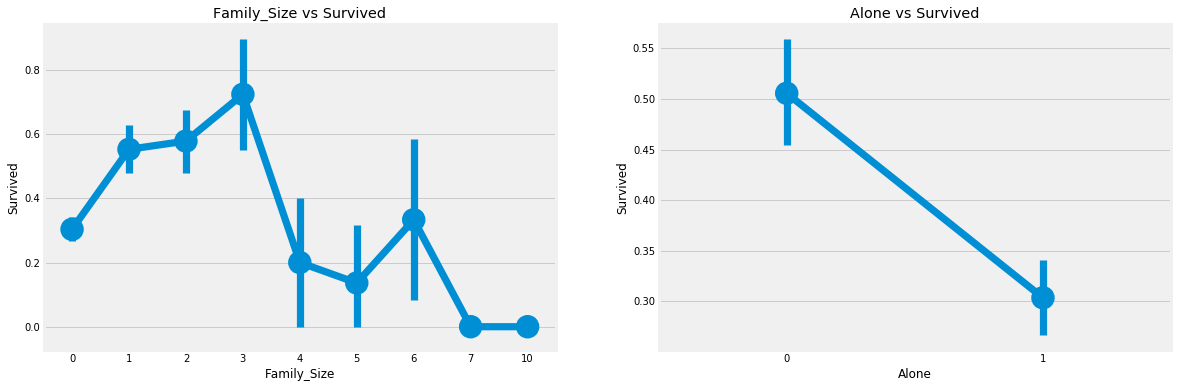

In [39]:
data['Family_Size'] = 0 #먼저 Family_Size라는 변수를 만들어서 다 0을 할당함
data['Family_Size'] = data["Parch"] + data["SibSp"] #그리고 두 변수의 합을 할당

data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone'] = 1 #앞서 구한 Family_Size가 0인 경우 Alone에 1 할당

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot('Family_Size', 'Survived', data = data, ax = ax [0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot('Alone', 'Survived', data = data, ax = ax [1])
ax[1].set_title('Alone vs Survived')

plt.show()

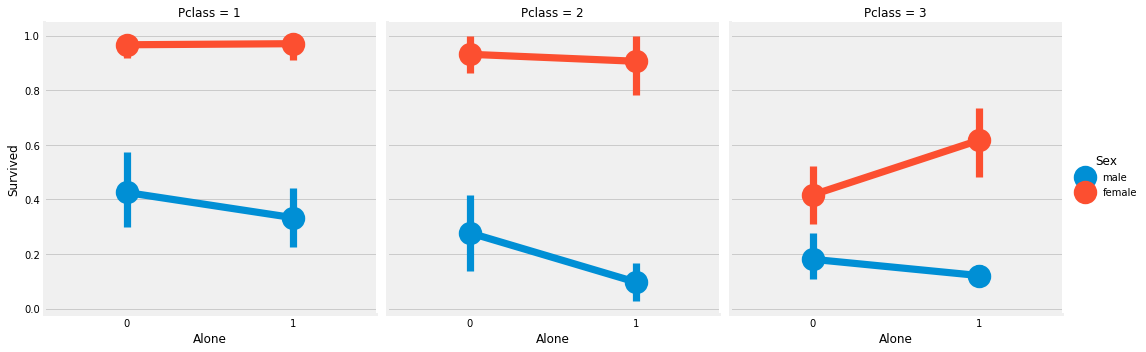

In [40]:
sns.factorplot('Alone','Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

남성의 경우 탑승칸과 무관하게 혼자 탑승했을 때 생존률이 낮아진다. 여성의 경우 2등칸일 때는 유사한 양상이지만 반대로 3등칸일 때는 혼자 탑승했을 때 생존확률이 높아진다.

### Fare_Range

탑승요금도 마찬가지로 연속변수여서 서열변수로 변환시켜주려고 한다. 이번에는 <b>pandas.qcut</b>을 활용해본다

<b>qcut</b>은 급간 수에 맞춰서 자르거나 정렬해주는 함수인데, 예를 들어 5개의 구간으로 묶으면(qcut(변수,5)) 동일 간격의 5개 구간으로 나눠준다.

In [41]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
# print(data['Fare_Range'].value_counts().to_frame())
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range가 증가할수록, 생존 확률도 올라간다.

지금 이 Fare_Range변수를 그대로 사용할 수는 없으니까, Age_Band에서 했던 것처럼 단일 값으로 변환한다.

In [42]:
data['Fare_cat']=0
data.loc[data['Fare'] <= 7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] = 3

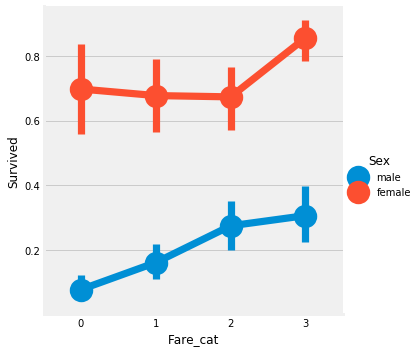

In [43]:
sns.factorplot('Fare_cat','Survived', data = data, hue = 'Sex')
plt.show()

앞서 살펴본대로, 요금 구간이 오를수록 생존확률이 오른다. 이 양상은 성별별로 다르기 때문에, 성별 변수와 함께 고려해서 모델링에 반영해야 할 것 같다.

### 문자열 변수 숫자로 바꾸기 Converting String Values into Numeric¶


머신러닝 모델에 문자열 변수를 넘길 수는 없기 때문에, 성별이나 탑승항구같은 문자열 변수들은 숫자 값으로 바꿔줘야 한다.

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

data[['Sex','Embarked','Initial']].head()

,Sex,Embarked,Initial
0,0,0,0
1,1,1,1
2,1,0,2
3,1,0,1
4,0,0,0


### 불필요한 변수 제거하기 Dropping UnNeeded Features

<b> Name --> </b> Name 변수는 어떤 범주형 변수로도 바꿀 수 없으니까 필요 없다.

<b> Age --> </b> Age 변수는 Age_band로 바꿨으니까 필요없다.

<b> Ticket --> </b> 단순 랜덤 문자열이니까 필요없다.

<b> Fare --> </b> Fare_cat변수로 변환헀으니 필요없다.

<b> Cabin --> </b> 너무 NaN값도 많고, 데이터에서 한 명이 여러개 Cabin을 가지는 경우가 많아서 불필요한 변수로 보인다.

<b> Fare_Range --> </b> Fare_cat변수로 대신 사용한다.

<b> PassengerId --> </b> 마찬가지로 범주화할 수 없다

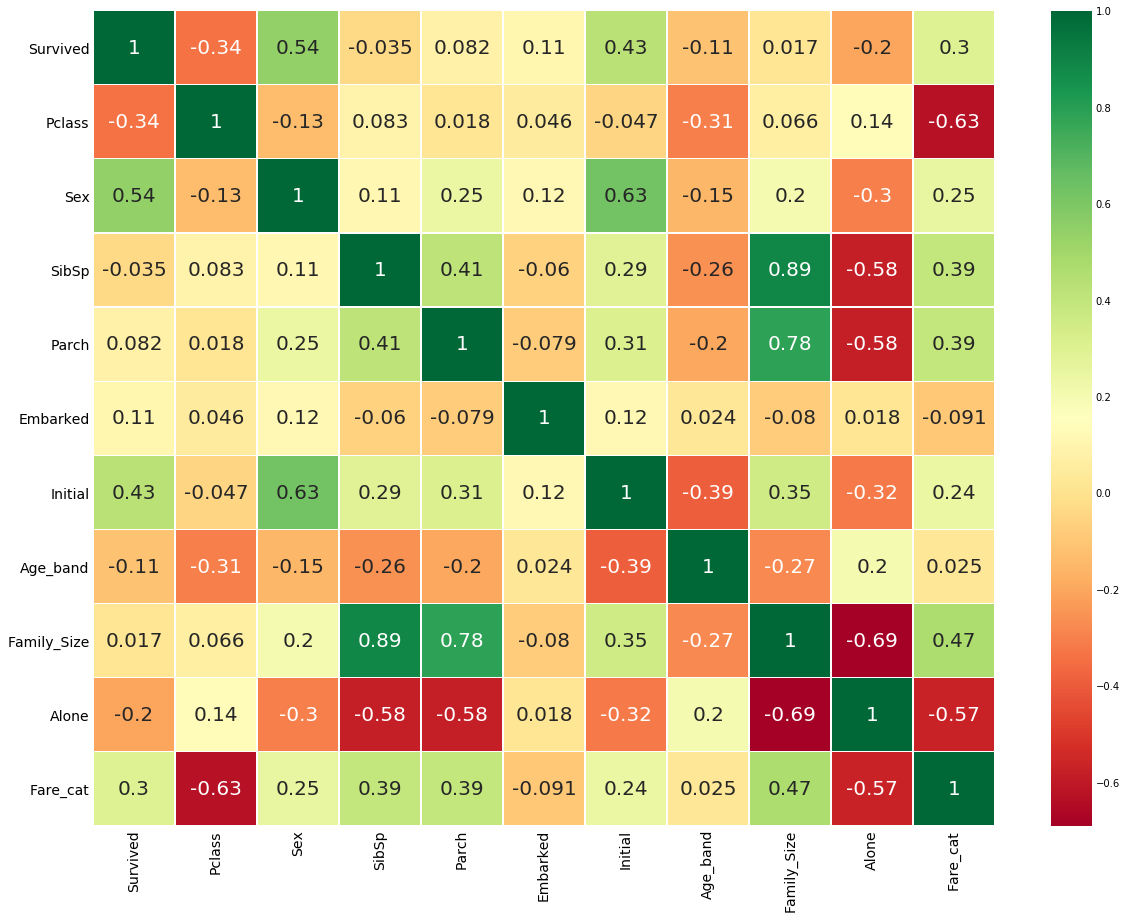

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis = 1, inplace= True)
#불필요한 변수 제거하기
#axis = 1(columns)

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#히트맵 그려서 남은 변수들간의 상관 확인하기

이제 저 correlation plot을 보면, 정적으로 연관된 변수 몇 개가 보인다.
SibSp와 Family_Size, Parch와 Family_Size 사이에 정적 상관이 있고, Alone과 Family_Size사이에 부적 상관이 있다.

## Part3: 예측 모델링 Predictive Modeling¶

EDA 파트에서 몇몇 인사이트를 얻었지만 그것만으로는 승객의 생존/사망 여부를 명확하게 예측할 수 없다. 그래서 분류 알고리즘(Classification Algorithms)을 활용해서 승객의 생존여부를 예측해보려고 한다. 아래의 알고리즘들이 바로 모델을 만들면서 사용할 알고리즘들이다 : 

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [46]:
# ML 관련 패키지 불러오기
from sklearn.linear_model import LogisticRegression #로지스틱회귀
from sklearn import svm #서포트 벡터 머신
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #나이브베이즈
from sklearn.tree import DecisionTreeClassifier #의사결정나무
from sklearn.model_selection import train_test_split #훈련/검증 셋 분리
from sklearn import metrics #정확성 측정
from sklearn.metrics import confusion_matrix #confusion matrix

In [47]:
train,test = train_test_split(data,test_size=0.3, random_state = 0, stratify=data['Survived'])
#random_state = 난수를 생성하는 방법에 대한 파라미터, none: default(=numpy.random, 할 때마다 다른 값), 숫자(대부분 0 or 42): 여러번 시행해도 동일한 결과)
#stratify = 데이터를 계층적으로 나눌건지

train_X=train[train.columns[1:]] #두번째 컬럼부터 마지막까지(Survived제외한 독립변수들)을 X값으로 저장
train_Y=train[train.columns[:1]] #train 데이터의 첫번쨰 열(Survived)만 꺼내서 Y값으로 저장,

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']


### Support Vector Machine(SVM)

<b>서포트 벡터 머신(SVM)</b>:<br>
- 분류(classification), 회귀(regresstion)의 목적으로 주로 활용
- 데이터를 분리하는 최적의 결정 경계를 찾는 알고리즘 (선형SVM, 비선형 SVM)
- 최적의 결정 경계란 다른 데이터를 가장 큰 margin(두 데이터 군과 결정 경계가 떨어져 있는 정도)으로 분리해내는 선/면(=결정 경계, 분리 초평면)
- 서포트 벡터란 두 클래스 사이의 경계에 위치한 데이터 포인트들을 의미함. 이 데이터의 위치에 따라 결정 경계의 위치가 달라지기 때문에 서포트한다고 부름
- C(cost)는 얼마나 오류(eg.이상치)를 허용할지에 대한 변수로, 
C를 크게 잡을수록 적은 오차를 허용하는 대신 과적합 가능성이 높아지고, C를 낮게 잡을수록 오차를 크게 허용하지만 보다 일반적인 경계를 찾아낼 수 있다.


- 하지만 선형SVM으로는 데이터를 제대로 분류할 수 없는 경우가 많고, 이 때 비선형 SVM, 대표적으로 RBF커널 SVM을 활용한다.

<b>RBF(Radial Basis Function) 커널을 이용한 SVM</b>:<br>
- 커널 기법 : 주어진 데이터를 고차원 특징 공간으로 사상해주는 것, 2차원 공간에서 분류할 수 없는 분류를 3차원으로 분류하고, 그를 다시 2차원으로 매핑함
- RBF커널에는 두 개의 매개변수(C, gamma)를 조정해줘야 함
- 선형 SVM에서 설정해야 하는 매개변수가 cost이고, RBF커널은 cost와 gamma 두 개를 조정해야 함.
- gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다. 즉, gamma가 클수록 작은 가우시안 표준편차를 갖는다.
- 정리하면, C는 데이터 샘플이 다른 클래스에 놓이는 것(오차)를 허용하는 정도를 결정하고, gamma는 결정경계의 곡률을 결정한다.
- gamma와 C 모두 커질수록 알고리즘이 복잡해지고, 작아질수록 알고리즘이 단순해진다.

<u> [출처]SVM, RBF커널 SVM에 대한 대략적 설명 자료 </u> <br>
- https://bskyvision.com/163
- https://stickie.tistory.com/50


#### Linear Support Vector Machine(linear-SVM)

In [48]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is: ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is:  0.8171641791044776


#### Radial Support Vector Machines(rbf-SVM)



In [49]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is: ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is:  0.835820895522388


### Logistic Regression

- S자 곡선의 sigmoid 함수를 활용해서 1 또는 -1의 양분된 결과값을 리턴
- sigmoid 함수의 리턴값은 입력한 트레이닝 데이터가 특정 클래스에 속할 확률을 뜻함(예측 확률)

<u>[출처]scikit-learn 로지스틱회귀</u><br>
- https://blog.naver.com/samsjang/220968297927

In [51]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy for Logistic Regression is: ',metrics.accuracy_score(prediction3,test_Y))

Accuracy for Logistic Regression is:  0.8134328358208955


### Decision Tree

- 쉽게 말하면, 여러개의 분류 문제를 계속 풀어내는 알고리즘(데이터를 계속 하위 노드로 가면서 분할)
- 분류와 회귀 모두 가능
- 다만 결정 경계가 수직이어서, 특정 데이터에만 잘 작동할 확률이 높음 > 이런 문제를 극복하기 위해 등장한 게 랜덤포레스트

<u>[출처]의사결정나무(Decision Tree)</u><br>
- https://ratsgo.github.io/machine%20learning/2017/03/26/tree/
- http://hleecaster.com/ml-decision-tree-concept/

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is:', metrics.accuracy_score(prediction4,test_Y))

Accuracy for Decision Tree is: 0.8097014925373134


### K-Nearest Neighbors(KNN)

- 분류 알고리즘(지도학습),유사한 특성을 가진 데이터는 유사한 범주(가까운 거리)에 속한다는 가정

- K 개수에 따라서 결과가 달라질 수 있음. 분류 정확도를 확인하면서 정확한 K개수를 찾아야 함

<u>[출처]</u><br>
- https://medium.com/@john_analyst/knn-%EC%B5%9C%EA%B7%BC%EC%A0%91-%EC%9D%B4%EC%9B%83-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-b397a0b2030e
- http://hleecaster.com/ml-knn-concept/

In [55]:
model=KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accucacy for KNN is:', metrics.accuracy_score(prediction5, test_Y))

Accucacy for KNN is: 0.832089552238806


KNN모델의 정확도는 K값(n_neighbors)의 개수에 따라 달라진다. 기본 값은 <b>5</b>이지만, 값을 바꿔가며 정확도를 확인해볼 수 있다. 

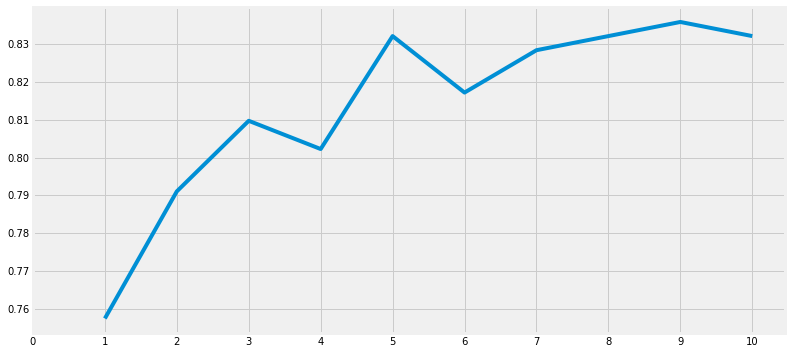

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [60]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) #K값에 1부터 10까지 하나씩 넣어보기
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y))) #앞에서 만들어놓은 빈 배열 a에 정확도 값 할당

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [63]:
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print('Accuracy of the NaiveBayes is:', metrics.accuracy_score(prediction6, test_Y))

Accuracy of the NaiveBayes is: 0.8134328358208955
